# micrograd exercises

1. watch the [micrograd video](https://www.youtube.com/watch?v=VMj-3S1tku0) on YouTube
2. come back and complete these exercises to level up :)

## section 1: derivatives

In [6]:
# here is a mathematical expression that takes 3 inputs and produces one output
from math import sin, cos

def f(a, b, c):
  return -a**3 + sin(3*b) - 1.0/c + b**2.5 - a**0.5

print(f(2, 3, 4))

6.336362190988558


In [7]:
# write the function df that returns the analytical gradient of f
# i.e. use your skills from calculus to take the derivative, then implement the formula
# if you do not calculus then feel free to ask wolframalpha, e.g.:
# https://www.wolframalpha.com/input?i=d%2Fda%28sin%283*a%29%29%29

def gradf(a, b, c):
  return [-3*a**2-0.5*a**(-0.5), 3*cos(3*b)+2.5*b**1.5, 1/c**2] # todo, return [df/da, df/db, df/dc]

# expected answer is the list of
ans = [-12.353553390593273, 10.25699027111255, 0.0625]
yours = gradf(2, 3, 4)
for dim in range(3):
  ok = 'OK' if abs(yours[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {yours[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353553390593273
OK for dim 1: expected 10.25699027111255, yours returns 10.25699027111255
OK for dim 2: expected 0.0625, yours returns 0.0625


In [8]:
# now estimate the gradient numerically without any calculus, using
# the approximation we used in the video.
# you should not call the function df from the last cell

# -----------
diff = 1e-10
numerical_grad = [(f(2+diff,3,4)-f(2,3,4))/diff, (f(2,3+diff,4)-f(2,3,4))/diff, (f(2,3,4+diff)-f(2,3,4))/diff] # TODO
# -----------

for dim in range(3):
  ok = 'OK' if abs(numerical_grad[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.35355817641448
OK for dim 1: expected 10.25699027111255, yours returns 10.256986371359744
OK for dim 2: expected 0.0625, yours returns 0.06250111539429781


In [9]:
# there is an alternative formula that provides a much better numerical
# approximation to the derivative of a function.
# learn about it here: https://en.wikipedia.org/wiki/Symmetric_derivative
# implement it. confirm that for the same step size h this version gives a
# better approximation.

# -----------
numerical_grad2 = [(f(2+diff,3,4)-f(2-diff,3,4))/(2*diff), (f(2,3+diff,4)-f(2,3-diff,4))/(2*diff), (f(2,3,4+diff)-f(2,3,4-diff))/(2*diff)] # TODO
# -----------

for dim in range(3):
  ok = 'OK' if abs(numerical_grad2[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad2[dim]}")


OK for dim 0: expected -12.353553390593273, yours returns -12.353553735522382
OK for dim 1: expected 10.25699027111255, yours returns 10.256990812251843
OK for dim 2: expected 0.0625, yours returns 0.06250111539429781


## section 2: support for softmax

In [10]:
# Value class starter code, with many functions taken out
from math import exp, log

class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other): # exactly as in the video
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  # ------
  # re-implement all the other functions needed for the exercises below
  # your code here
  def __radd__(self, other):
    return self + other
  
  def exp(self):
    out = Value(exp(self.data), (self,), 'exp')

    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward

    return out
  
  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
      print(self, self.grad)
    out._backward = _backward

    return out

  def __rmul__(self, other):
    return self * other
  
  def __truediv__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data / other.data, (self, other), '/')

    def _backward():
      self.grad += (1 / other.data) * out.grad
      other.grad += -1 * (self.data / other.data**2) * out.grad
    out._backward = _backward

    return out
  
  def __neg__(self):
    return self * -1
  
  def __sub__(self, other):
    return self + (-other)
  
  def __rsub__(self, other):
    return other + (-self)
  
  def log(self):
    out = Value(log(self.data), (self,), 'log')

    def _backward():
      self.grad += (1 / self.data) * out.grad
      print(self, (1 / self.data))
    out._backward = _backward

    return out
  
  def __radd__(self, other):
    return self + other

  def backward(self): # exactly as in video
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [11]:
# without referencing our code/video __too__ much, make this cell work
# you'll have to implement (in some cases re-implemented) a number of functions
# of the Value object, similar to what we've seen in the video.
# instead of the squared error loss this implements the negative log likelihood
# loss, which is very often used in classification.

# this is the softmax function
# https://en.wikipedia.org/wiki/Softmax_function
def softmax(logits):
  counts = [logit.exp() for logit in logits]
  denominator = sum(counts)
  out = [c / denominator for c in counts]
  return out

# this is the negative log likelihood loss function, pervasive in classification
logits = [Value(0.0), Value(3.0), Value(-2.0), Value(1.0)]
probs = softmax(logits)
print(probs)
loss = -probs[3].log() # dim 3 acts as the label for this input example
print(loss.data)
loss.backward()

ans = [0.041772570515350445, 0.8390245074625319, 0.005653302662216329, -0.8864503806400986]
for dim in range(4):
  ok = 'OK' if abs(logits[dim].grad - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {logits[dim].grad}")


[Value(data=0.04177257051535045), Value(data=0.839024507462532), Value(data=0.005653302662216329), Value(data=0.11354961935990121)]
2.1755153626167147
Value(data=-2.1755153626167147) -1.0
Value(data=0.11354961935990121) 8.806722608469958
OK for dim 0: expected 0.041772570515350445, yours returns 0.041772570515350445
OK for dim 1: expected 0.8390245074625319, yours returns 0.8390245074625319
OK for dim 2: expected 0.005653302662216329, yours returns 0.005653302662216329
OK for dim 3: expected -0.8864503806400986, yours returns -0.886450380640099


In [13]:
# verify the gradient using the torch library
# torch should give you the exact same gradient
import torch

logits = [torch.tensor(0.0, requires_grad=True), torch.tensor(3.0, requires_grad=True), torch.tensor(-2.0, requires_grad=True), torch.tensor(1.0, requires_grad=True)]
probs = softmax(logits)
print(probs)
loss = -probs[3].log() # dim 3 acts as the label for this input example
print(loss.data)
loss.backward()

for dim in range(4):
  ok = 'OK' if abs(logits[dim].grad - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {logits[dim].grad}")

[tensor(0.0418, grad_fn=<DivBackward0>), tensor(0.8390, grad_fn=<DivBackward0>), tensor(0.0057, grad_fn=<DivBackward0>), tensor(0.1135, grad_fn=<DivBackward0>)]
tensor(2.1755)
OK for dim 0: expected 0.041772570515350445, yours returns 0.041772566735744476
OK for dim 1: expected 0.8390245074625319, yours returns 0.8390244245529175
OK for dim 2: expected 0.005653302662216329, yours returns 0.005653302185237408
OK for dim 3: expected -0.8864503806400986, yours returns -0.8864503502845764


Create an implementation of the backpropagation algorithm an a way to train a linear regression model using the following data:

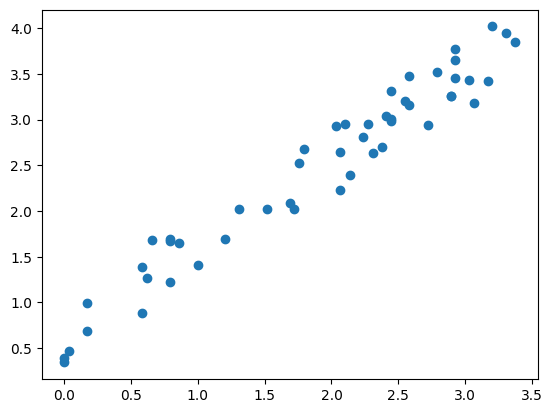

In [118]:
import math, random
import matplotlib.pyplot as plt
import numpy as np

def y_fn(x):
    return 15 + 2*x + random.random()*50

X = [random.randrange(0, 100) for _ in range(50)]
y = [y_fn(x) for x in X]

X = np.array(X)
y = np.array(y)
X = X / X.std()
y = y / y.std()

plt.scatter(X, y)

Create an object capable of keeping and calculating the gradient, and implement the backpropagation algorithm as a method. Create a linear regression model with only tow parameters (y=m*x+b), and use the Mean Squared Error as the loss function. Moreover, you must create a train function to update the parameters of the model.

In [120]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X.reshape(-1,1), y)
print(reg.score(X.reshape(-1,1), y))
reg.coef_, reg.intercept_

0.9485482320662991


(array([0.97393441]), 0.6205889935008362)

In [121]:
class GradVal():
    def __init__(self, data, children = tuple(), _op = ''):
        self.data = data
        self.children = children
        self._op = _op
        self.grad = 0
        self._backward = lambda: None

    def __mul__(self, other):
        try:
            other = other if isinstance(other, GradVal) else GradVal(other)
            out = GradVal(self.data * other.data, (self, other), '*')
        except Exception as e:
            print(f'Error multiplying {self, other}')
            raise e

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.grad * out.grad
        out._backward = _backward
        return out
    
    def __add__(self, other):
        other = other if isinstance(other, GradVal) else GradVal(other)
        out = GradVal(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward
        return out
    
    def __radd__(self, other):
        return self + other
    
    def __sub__(self, other):
        return self + -1 * other
    
    def backward(self):
        self._backward()
        for child in self.children:
            child.backward()
    
    def backpropagation(self):
        self.grad = 1.0
        self.backward()

    def __repr__(self) -> str:
        return f'GradVal({self.data:.5f})'


class Model():
    def __init__(self):
        self.parameters = [GradVal(random.random()), GradVal(random.random())]
    
    def __call__(self, x):
        return self.parameters[0]*x + self.parameters[1]


In [122]:
def MSE(y_preds, y_reals):
    return sum([(y_preds[i] - y_reals[i]) * (y_preds[i] - y_reals[i]) for i in range(len(y_preds))]) * (1/len(y_preds))

def train(loss_fn, model, X, y, lr=1e-1, epochs = 10):
    for e in range(epochs):
        print(f'Epoch {e+1}')
       
        loss = loss_fn([model(x) for x in X], y)
        print(f'loss:', loss)
        loss.backpropagation()

        for p in model.parameters:
            p.data -= lr * p.grad
            p.grad = 0.0
        print(model.parameters)
        print([p.grad for p in model.parameters])

In [123]:
model = Model()
model.parameters

[GradVal(0.86538), GradVal(0.41385)]

In [124]:
train(MSE, model, X, y, epochs=100)

Epoch 1
loss: GradVal(0.23261)
[GradVal(1.13267), GradVal(0.49699)]
[0.0, 0.0]
Epoch 2
loss: GradVal(0.10758)
[GradVal(0.98451), GradVal(0.46146)]
[0.0, 0.0]
Epoch 3
loss: GradVal(0.07093)
[GradVal(1.06062), GradVal(0.48957)]
[0.0, 0.0]
Epoch 4
loss: GradVal(0.06002)
[GradVal(1.01590), GradVal(0.48300)]
[0.0, 0.0]
Epoch 5
loss: GradVal(0.05662)
[GradVal(1.03651), GradVal(0.49480)]
[0.0, 0.0]
Epoch 6
loss: GradVal(0.05543)
[GradVal(1.02202), GradVal(0.49636)]
[0.0, 0.0]
Epoch 7
loss: GradVal(0.05489)
[GradVal(1.02659), GradVal(0.50313)]
[0.0, 0.0]
Epoch 8
loss: GradVal(0.05455)
[GradVal(1.02101), GradVal(0.50679)]
[0.0, 0.0]
Epoch 9
loss: GradVal(0.05429)
[GradVal(1.02103), GradVal(0.51183)]
[0.0, 0.0]
Epoch 10
loss: GradVal(0.05407)
[GradVal(1.01815), GradVal(0.51585)]
[0.0, 0.0]
Epoch 11
loss: GradVal(0.05386)
[GradVal(1.01694), GradVal(0.52016)]
[0.0, 0.0]
Epoch 12
loss: GradVal(0.05367)
[GradVal(1.01494), GradVal(0.52406)]
[0.0, 0.0]
Epoch 13
loss: GradVal(0.05350)
[GradVal(1.01348)

In [125]:
model.parameters

[GradVal(0.97511), GradVal(0.61784)]

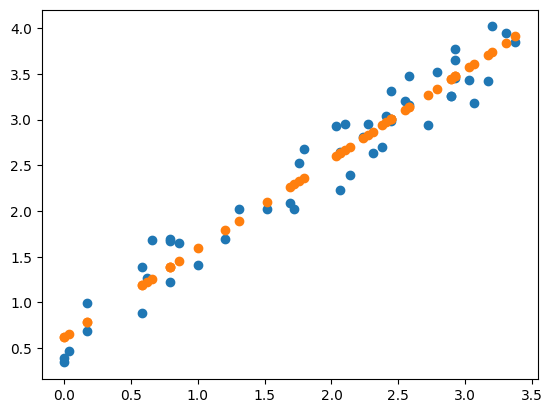

In [126]:
y_preds = [model(x) for x in X]

plt.scatter(X, y)
plt.scatter(X, [y.data for y in y_preds])

In [1]:
import math
p1 = 0.9
p2= 0.8
p3 = 0.3

n = 100
k = 20

def get_p(k, n):
    p = 0
    for r in range(k,n+1):
        # print('registered', r)
        p_r = (math.comb(n,r)* p1**r * (1-p1)**(n-r))
        for v in range(k,r+1):
            # print('voted', v)
            p_v = (math.comb(r,v)* p2**v * (1-p2)**(r-v))
            
            # print('kodos', k)
            p_k = (math.comb(v,k)* p3**k * (1-p3)**(v-k))

            p += p_r*p_v*p_k
    return p

get_p(k,n)

0.09194145093705215

In [8]:
n = 10
k = 3
print(math.comb(n,k))
result = 0
for i in range(k,n+1):
    result += math.comb(n,i)*math.comb(i,k)
result

120


15360

In [13]:
result = 0
for i in range(k,n+1):
    result += (math.factorial(n-i))/((math.factorial(n-i)-1)*math.factorial(i-k)*math.factorial(k))
    # print(math.comb(i,k), math.factorial(i)-1)
math.comb(n,k)*result

ZeroDivisionError: division by zero

In [42]:
p1= 0.3
result = 0
for i in range(4, 10+1):
    res = math.comb(10,i) * p1**i * (1-p1)**(10-i)
    result += res
    print(i, res, result)
result

4 0.2001209489999999 0.2001209489999999
5 0.10291934519999994 0.30304029419999984
6 0.03675690899999999 0.33979720319999984
7 0.009001691999999995 0.34879889519999985
8 0.0014467004999999993 0.35024559569999986
9 0.00013778099999999996 0.35038337669999986
10 5.9048999999999975e-06 0.3503892815999999


0.3503892815999999

In [43]:
result = 0
for i in range(0, 10+1):
    res = math.comb(10,i) * p1**i * (1-p1)**(10-i)
    result += res
    print(i, res, result)
result

0 0.028247524899999984 0.028247524899999984
1 0.12106082099999993 0.14930834589999992
2 0.23347444049999988 0.3827827863999998
3 0.2668279319999998 0.6496107183999996
4 0.2001209489999999 0.8497316673999995
5 0.10291934519999994 0.9526510125999994
6 0.03675690899999999 0.9894079215999994
7 0.009001691999999995 0.9984096135999994
8 0.0014467004999999993 0.9998563140999993
9 0.00013778099999999996 0.9999940950999993
10 5.9048999999999975e-06 0.9999999999999992


0.9999999999999992

In [25]:
n= 10
result = 0
for k in range(2,n+1):
    result += math.comb(n,k)
result

1013

In [7]:
math.factorial(3)*math.factorial(2)*math.factorial(5)

1440

In [9]:
5*(math.factorial(10) / (math.factorial(3)*math.factorial(2)*math.factorial(5)))

12600.0

In [10]:
math.comb(10,5)

252

In [17]:
n = 10
k = 5

print(math.comb(n,5))
result = 0
for i in range(k,n+1):
    for v in range(k, i+1):
        result += math.comb(n,i)*math.comb(i,v)*math.comb(v,k)
result

252


61236

In [20]:

math.log(61236, 252)

1.9934228934677878